In [2]:
!ls -al


total 53692
drwxr-xr-x 1 root root     4096 Oct  1 06:46 .
drwxr-xr-x 1 root root     4096 Oct  1 06:24 ..
drwxr-xr-x 4 root root     4096 Sep 27 20:11 .config
drwxr-xr-x 2 root root     4096 Sep 27 20:32 sample_data
-rw-r--r-- 1 root root  7840016 Oct  1 06:49 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root    10008 Oct  1 06:46 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root 47040016 Oct  1 06:46 train-images-idx3-ubyte
-rw-r--r-- 1 root root    60008 Oct  1 06:31 train-labels-idx1-ubyte


In [3]:
from google.colab import files
import io
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

**Imports Used throughout assignment:**


In [0]:
import time
import struct as st
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [5]:

stime = time.time()
filename = {'images' : 'train-images-idx3-ubyte' ,'labels' : 'train-labels-idx1-ubyte','testImages' : 't10k-images-idx3-ubyte' ,'testLabels' : 't10k-labels-idx1-ubyte'}

labels_array = np.array([])

data_types = {
        0x08: ('ubyte', 'B', 1),
        0x09: ('byte', 'b', 1),
        0x0B: ('>i2', 'h', 2),
        0x0C: ('>i4', 'i', 4),
        0x0D: ('>f4', 'f', 4),
        0x0E: ('>f8', 'd', 8)}

for name in filename.keys():
    if name == 'images':
        imagesfile = open(filename[name],'rb')
    if name == 'labels':
        labelsfile = open(filename[name],'rb')
    if name == 'testImages':
        testImagesFile = open(filename[name],'rb')
    if name == 'testLabels':
        testLabelsFile = open(filename[name],'rb')

        
def getParams(file):
  file.seek(4)
  nImg = st.unpack('>I',file.read(4))[0] #num of images/labels
  nR = st.unpack('>I',file.read(4))[0] #num of rows
  nC = st.unpack('>I',file.read(4))[0] #num of columns
  return nImg,nR,nC
  
#reading magic number
imagesfile.seek(0)
magic = st.unpack('>4B',imagesfile.read(4))

print(magic)
if(magic[0] and magic[1])or(magic[2] not in data_types):
    raise ValueError("File Format not correct")

nDim = magic[3]
print("Data is ",nDim,"-D")


nImg,nR,nC= getParams(imagesfile)
nBytes = nImg*nR*nC
labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)


nImgTest,nRTest,nCTest= getParams(testImagesFile)
nBytesTest = nImgTest*nRTest*nCTest
testLabelsFile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images test :: ",nImgTest)
print("no. of rows test:: ",nRTest)
print("no. of columns test:: ",nCTest)


#Read all data bytes at once and then reshape
normalizingValue=(255  *0.99 + 0.01)
train_imgs = np.asarray(st.unpack('>'+'B'*nBytes,imagesfile.read(nBytes))).reshape((nImg,nR*nC))
train_labels = np.asarray(st.unpack('>'+'B'*nImg,labelsfile.read(nImg))).reshape((nImg,1))

test_imgs = np.asarray(st.unpack('>'+'B'*nBytesTest,testImagesFile.read(nBytesTest))).reshape((nImgTest,nRTest*nCTest))
test_labels = np.asarray(st.unpack('>'+'B'*nImgTest,testLabelsFile.read(nImgTest))).reshape((nImgTest,1))
# images_array=np.true_divide(images_array,normalizingValue)
# test_images_array=np.true_divide(test_images_array,normalizingValue)


lr = np.arange(10)
# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)
# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

train_imgs=0.99 - (((0.98) * (255 - train_imgs)) / 255)
test_imgs=0.99 - (((0.98) * (255 - test_imgs)) / 255)
no_of_different_labels = 10 
image_size=28
image_pixels = image_size * image_size
print("Time of execution : %s seconds" % str(time.time()-stime))

(0, 0, 8, 3)
Data is  3 -D
no. of images ::  60000
no. of rows ::  28
no. of columns ::  28
no. of images test ::  10000
no. of rows test::  28
no. of columns test::  28
Time of execution : 10.622454166412354 seconds


In [0]:

def sigmoid(x):
    return 1 / (1 + np.e ** -x)
def sigDerivative(x):
  return x*(1-x)
  
activation_function = sigmoid

class NeuralNetwork:
    
    def __init__(self,inNodes, outNodes, hiddenNodes,learningRate,epochs):
      self.inNodes = inNodes
      self.outNodes = outNodes
      self.hiddenNodes = hiddenNodes
      self.learningRate = learningRate 
      self.itohweights=np.random.randn(self.hiddenNodes, self.inNodes)
      self.htooweights=np.random.randn(self.outNodes, self.hiddenNodes)
      self.xj=[]
      self.epochs=epochs
        
    def forwardPropagation(self,inputVector):
      inputVector = np.array(inputVector, ndmin=2).T

      output_vector1 = np.dot(self.itohweights, inputVector)
      self.xj = sigmoid(output_vector1)

      output_vector2 = np.dot(self.htooweights,self.xj)
      return sigmoid(output_vector2)
      
    def backPropagation(self,inputVector,targetVector,expectedVector):
        targetVector = np.array(targetVector, ndmin=2).T
        inputVector = np.array(inputVector, ndmin=2).T
      
        errors = targetVector - expectedVector
        tmp = errors * sigDerivative(expectedVector )
        
        self.htooweights += self.learningRate  * np.dot(tmp,self.xj.T)
        
        # calculate hidden errors:
        hidden_errors = np.dot(self.htooweights.T,errors)
        # update the weights:
        tmp = hidden_errors * sigDerivative(self.xj)
        self.itohweights += self.learningRate * np.dot(tmp, inputVector.T)
        
      
    
    def train(self, inputVector, targetVector):
        for ep in range(self.epochs):
          self.backPropagation(inputVector,targetVector,self.forwardPropagation(inputVector))
          
          
    def run(self, inputVector):
       
        return self.forwardPropagation(inputVector)
            
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm   
    def evaluate(self, data, labels):
      corrects, wrongs = 0, 0
      for i in range(len(data)):
          res = self.run(data[i])
          res_max = res.argmax()
          if res_max == labels[i]:
              corrects += 1
          else:
              wrongs += 1
      return corrects, wrongs

In [0]:
class measuresOfConMatrix:
  def __init__(self,cm):
    self.cm=cm
    self.TP=self.getTP()
    self.TN=self.getTN()
    self.FP=self.getFP()
    self.FN=self.getFN()
    self.tot=self.TP+self.TN+self.FP+self.FN
  def errorRate(self):
    return np.around(((self.FP+self.FN)/self.tot),decimals=3)

  def accuracy(self):
    return np.around((self.TP+self.TN)/self.tot,decimals=3)

  def precision(self):
    return np.around((self.TP/(self.TP+self.FP)),decimals=3)
  def recall(self):
    return np.around((self.TP/(self.TP+self.FN)),decimals=3)
  def specificity(self):
    return np.around((self.TN/(self.FP+self.TN)),decimals=3)

  def getTP(self):
        return np.diag(self.cm)
  def getFP(self):
      FP = []
      for i in range(10):
        FP.append(sum(self.cm[:,i]) - self.cm[i,i])
      return np.array(FP)
  def getFN(self):  
      FN = []
      for i in range(10):
          FN.append(sum(self.cm[i,:]) - self.cm[i,i])
      return np.array(FN)
  def getTN(self):
      TN = []
      for i in range(10):
          temp = np.delete(self.cm, i, 0)   # delete ith row
          temp = np.delete(temp, i, 1)  # delete ith column
          TN.append(sum(sum(temp)))
      return np.array(TN)

**5 FoldCross Validation:**

 In the below we are doing a 5 fold cross validation. The entire data set is divided into 5 equal partions. In each iteration we consider 4 sets as the training sets and remaining set as the test set. Over these training and test sets the model is trained and tested. Each time error is calculated. This is called as the cross validation error. Average is found of these error values.
 
 The above process is repeated for different models and the one with the least average error is chosen. This model is then used to train the entire dataset and then test it. 
 
 This process of cross validations allows us to choose the best model with least average error.
 
 In the below code Stochaistic Gradient odel is used with different hyper parameters in each Cross Validation.
 
 **Observations:**

1.  As the number of hidden unit increases the time taken to execute also increases
2.   As the chosen model is Stochaistic Gradient descent, it updates the weight matrix for each of the epoch and hence the time consumed is more.
3. The minimum cross validation average error is **0.17968**

**Confusion Matrix:**

It is a 10 x 10 matrix, where the rows represent the true label of a test sample and the columnsrepresent the predicted labels of the NN classifier

There are many measures of Confusion matrix like error, accuracy, standard deviation and many more.

TP: True Positive
TN: True Negative
FP: False Positive
FP: False Negative

Error = (FP+FN)/(TP+TN+FP+FN)

Accuracy = (TP+TN)/(TP+TN+FP+FN)

Sensitivity/Recall = TP/(TP+FN)

Specificity = TN/(FP+TN)

Precision =  TP/(TP+FP)

Below are the observations for the best model used
Model  Used :  Stochastic Gradient descent Model

Hyper Parameters:

$\eta $=0.01, 
number of hidden layers = 1, 
number of hidden nodes in one layer = 100, 
number of epochs = 1

**Confusion Matrix obtained:**

$\left[ \begin{array}{cccc}
 930    & 0  & 21  &  8  &  3 &  22  & 20 &   8 &  14&   11 \\
  0 &1104  &  7  &  4&    5 &   3  &  2 &  13 &  10  &  4\\
 [   8  &  4&  848  & 25 &  12&    6 &  10 &  20  & 14 &   5\\
 [   7  &  9&   33&  875&    0 &  56 &   3   & 8 &  54  & 17\\
 [   1   & 1   &14   & 1 & 848  & 21   &14  & 14  & 18&   71\\
 [   8    &1   & 3   &35   & 2&  693&   13  &  4  & 25  & 15\\
 [  14    &8  & 24  & 13 &  23 &  17&  890 &   4  & 22  &  1\\
 [   4   & 1  & 16  & 12  &  2 &   9   & 0&  884 &   6  & 18\\
 [   6   & 7  & 51 &  22  & 14 &  40  &  6  & 12 & 774  & 17\\
 [   2   & 0  & 15 &  15  & 73  & 25  &  0 &  61   &37 & 850\\
\end{array} \right]$




**Total Accuracy:** 86.96%

** Total Error: ** 13.0999%

**Average Error of all folds in Cross Validation: **   0.17968
 
 
 **Average Error of digits:** 2.61%
 **Average Standard Deviation:**  0.00938562730988185
 

 | Digit | Precision|Recall|Accuracy | Specificity |Error
|------|------|------|------|------|------|
| 0 | 0.949 | 0.897 | 0.984 | 0.994 | 0.016 
| 1 | 0.973 | 0.958 | 0.992 | 0.996 | 0.008 
| 2 | 0.822 | 0.891 | 0.971 | 0.98 | 0.029 
| 3 | 0.866 | 0.824 | 0.968 | 0.985 | 0.032 
| 4 | 0.864 | 0.845 | 0.971 | 0.985 | 0.029 
| 5 | 0.777 | 0.867 | 0.97 | 0.978 | 0.03 
| 6 | 0.929 | 0.876 | 0.981 | 0.992 | 0.019 
| 7 | 0.86 | 0.929 | 0.979 | 0.984 | 0.021 
| 8 | 0.795 | 0.816 | 0.962 | 0.978 | 0.038 
| 9 | 0.842 | 0.788 | 0.961 | 0.982 | 0.039

In [8]:
train_imgs=train_imgs.reshape(nImg,nR*nC)

test_imgs=test_imgs.reshape(nImgTest,nRTest*nCTest)
numberOfFolds=5
hyperParameters=[[100,0.01,1],[100,0.01,5],[200,1,1],[200,0.01,5]]
errorTracker=[]
stdTracker=[]
avgErrorTracker=[]
minErrorIndex=0
minError=10000

for index in range(len(hyperParameters)):
  print("-----------------------------------START----------------------------------------")
  kfold = KFold(numberOfFolds,False, 1)
  print("hiddenNodes : ", hyperParameters[index][0], "learningRate = ",hyperParameters[index][1],"epochs= ",hyperParameters[index][2])
  foldError=[]
  stdError=[]
  for train, test in kfold.split(train_imgs):
    nn = NeuralNetwork(inNodes = image_pixels, outNodes = 10,  hiddenNodes = hyperParameters[index][0], learningRate = hyperParameters[index][1],epochs=hyperParameters[index][2])
    trainingSetImg=train_imgs[train]
    testingSetImg=train_imgs[test]   
    trainingSetLabel=train_labels_one_hot[train]
    testingSetLabel=train_labels_one_hot[test]
    for k in range(trainingSetImg.shape[0]):
      nn.train(trainingSetImg[k], trainingSetLabel[k])
    cm = nn.confusion_matrix(testingSetImg, testingSetLabel)

    conMatrixMeasures=measuresOfConMatrix(cm)
    foldError.append(np.average(conMatrixMeasures.errorRate()))
    stdError.append(np.std(conMatrixMeasures.errorRate()))
  print("Error at folds : ",foldError)
  errorTracker.append(foldError)
  stdTracker.append(stdError)
  avgError=np.average(foldError)
  print("Average Error : ",avgError)
  avgErrorTracker.append(avgError)
  if(avgError<minError):
    minError=avgError
    minErrorIndex=index
  print("-----------------------------------END----------------------------------------")
   
print("Min Error Index : ",minErrorIndex,"Min Error : ",minError)
print("Model Used: ",hyperParameters[minErrorIndex])    
nn = NeuralNetwork(inNodes = image_pixels, outNodes = 10,  hiddenNodes = hyperParameters[minErrorIndex][0], learningRate = hyperParameters[minErrorIndex][1],epochs=hyperParameters[minErrorIndex][2])   
for i in range(train_imgs.shape[0]):
  nn.train(train_imgs[i],train_labels_one_hot[i])
cm=nn.confusion_matrix(test_imgs, test_labels)
print(cm)
conMatrixMeasures=measuresOfConMatrix(cm)
corrects, wrongs = nn.evaluate(test_imgs, test_labels)
accuracy=corrects / ( corrects + wrongs)
for i in range(10):
  print("digit: ", i, "Precision: ", conMatrixMeasures.precision()[i], "Recall: ", conMatrixMeasures.recall()[i],
       "Accuracy: ", conMatrixMeasures.accuracy()[i], "Specificity: ", conMatrixMeasures.specificity()[i],
       "errorRate: ",conMatrixMeasures.errorRate()[i])
print("Accuracy : ",accuracy,"Total Error : ",1-accuracy,"Average error: ",np.average(conMatrixMeasures.errorRate()),"Average Standar Deviation of Error Rate:",np.std(conMatrixMeasures.errorRate()));



-----------------------------------START----------------------------------------
hiddenNodes :  100 learningRate =  0.01 epochs=  1
Error at folds :  [0.17940000000000003, 0.1794, 0.1799, 0.18030000000000002, 0.1794]
Average Error :  0.17968
-----------------------------------END----------------------------------------
-----------------------------------START----------------------------------------
hiddenNodes :  100 learningRate =  0.01 epochs=  5
Error at folds :  [0.1799, 0.17930000000000001, 0.1801, 0.17950000000000002, 0.18080000000000002]
Average Error :  0.17992
-----------------------------------END----------------------------------------
-----------------------------------START----------------------------------------
hiddenNodes :  200 learningRate =  1 epochs=  1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


Error at folds :  [0.18209999999999998, 0.1802, 0.1835, 0.1802, 0.1839]
Average Error :  0.18197999999999998
-----------------------------------END----------------------------------------
-----------------------------------START----------------------------------------
hiddenNodes :  200 learningRate =  0.01 epochs=  5
Error at folds :  [0.17970000000000003, 0.17950000000000005, 0.1814, 0.1798, 0.18080000000000002]
Average Error :  0.18024
-----------------------------------END----------------------------------------
Min Error Index :  0 Min Error :  0.17968
Model Used:  [100, 0.01, 1]
[[ 930    0   21    8    3   22   20    8   14   11]
 [   0 1104    7    4    5    3    2   13   10    4]
 [   8    4  848   25   12    6   10   20   14    5]
 [   7    9   33  875    0   56    3    8   54   17]
 [   1    1   14    1  848   21   14   14   18   71]
 [   8    1    3   35    2  693   13    4   25   15]
 [  14    8   24   13   23   17  890    4   22    1]
 [   4    1   16   12    2    9    0 

Error at each fold : [0.17940000000000003, 0.1794, 0.1799, 0.18030000000000002, 0.1794]


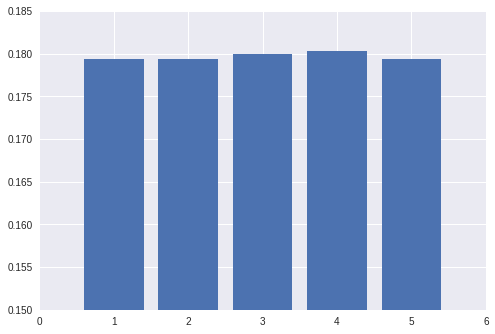

Standard Deviation Error at each fold : [0.23905990880948647, 0.23940726806009877, 0.23994768179751189, 0.24068944721362423, 0.2392618649095589]


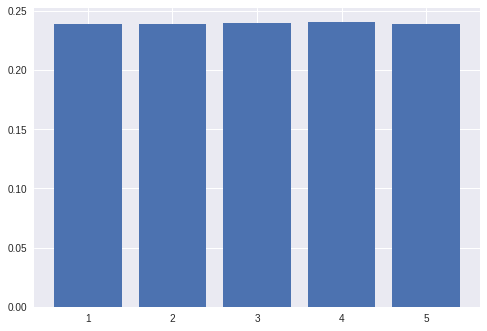

In [9]:
x=np.arange(1,numberOfFolds+1,1)
print("Error at each fold :",errorTracker[minErrorIndex])
plt.bar(x,errorTracker[minErrorIndex])
plt.xlim(0,6)
plt.ylim(0.15,0.185)
plt.show()
print("Standard Deviation Error at each fold :",stdTracker[minErrorIndex])

plt.bar(x,stdTracker[minErrorIndex])
plt.show()

** K Nearest Neighbour:**

This is a classifier that does not require any training.
 The prediction is done by calculating the eucledian distance. The 1 nearest neighbour that is closest is considered to be the class of the data point.
 
 Eucledian Distance is claculated as $\sqrt{(x1-x2)^2+(y1-y2)^2}$
 
 
 This is the simplest model that can be iplemented, but the drawback is the time taken to claculate. It has to find the distance between the given point and all the training set and then sort these distances to find the minimum. 
 
 **Note:** As it takes a lot of time, only 1st 100 test data is considered.
 
 
 **Accuracy:** 
 
**Observation:**

1. The accuracy of 1 NN Classifierr is than MLFFNN Classifier

In [0]:
train_imgs=train_imgs.reshape(nImg,nR,nC)
test_imgs=test_imgs.reshape(nImgTest,nRTest,nCTest)

class NearestNeighborClassifier(object):
    
    def __init__(self, dataset, k):
        self.dataset = dataset
        self.k = k
        
    def predict(self, point):
#       candidates = self.dataset[:]

#       neighbors = []
#       while len(neighbors) < self.k:
#           distances = [self.distance(x[0], point) for x in candidates]
#           best_distance = min(distances)
#           index = distances.index(best_distance)
#           neighbors.append(candidates[index])
#           del candidates[index]

#       prediction = self.consensus([value[1] for value in neighbors])
#       return prediction
        distances = [self.distance(x[0], point) for x in self.dataset]
        # Naive approach: sort based on distances, take the first k elements.
        values = sorted(zip(distances, self.dataset),key = lambda val: val[0])
#         values.sort(key = lambda val: val[0])
        # Predict by averaging the closets k elements.
        prediction = self.consensus([value[1][1] for value in values[0:k]])
        return prediction
        
def euclidean_distance(img1, img2):
    return np.sum((img1-img2)**2)
  
  
from collections import defaultdict
def get_majority(votes):
    # For convenience, we're going to use a defaultdict.
    # This is just a dictionary where values are initialized to zero
    # if they don't exist
    print(votes)
    counter = defaultdict(int)
    for vote in votes:
        # If this weren't a defaultdict, this would error on new vote values.
#         counter[vote] += 1
#         print(vote[0])
        counter[vote[0]] += 1
    
    
    # Find out who was the majority.
    majority_count = max(counter.values())
    for key, value in counter.items():
        if value == majority_count:
            return key
          
          
class MNISTPredictor(NearestNeighborClassifier):
    def distance(self, p1, p2):
        return euclidean_distance(p1, p2)
    
    def consensus(self, values):
#         print(values)
        return get_majority(values)
    
# Convert our data set into an easy format to use.
# This is a list of (x, y) pairs. x is an image, y is a label.
dataset = []
for i in range(len(train_imgs)):
    dataset.append((train_imgs[i, :, :], train_labels[i]))
    
# Create a predictor for various values of k.
ks = [1]
predictors = [MNISTPredictor(dataset, k) for k in ks] 

def predict_test_set(predictor, test_set):
    """Compute the prediction for every element of the test set."""
    predictions = [predictor.predict(test_set[i, :, :]) 
                   for i in range(len(test_set))]
    return predictions

# Choose a subset of the test set. Otherwise this will never finish.
test_set = test_imgs[0:100, :, :]
all_predictions = [predict_test_set(predictor, test_set) for predictor in predictors]

def evaluate_prediction(predictions, answers):
    """Compute how many were identical in the answers and predictions,
    and divide this by the number of predictions to get a percentage."""
    correct = sum(asarray(predictions) == asarray(answers))
    total = float(prod(answers.shape))
    return correct / total

labels = asarray(test_labels[0:100])
accuracies = [evaluate_prediction(pred, labels) for pred in all_predictions]

1
